n - число окошек

k - число людей в очереди

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedSet


def run_a(alpha, n):
    out = np.random.exponential(1/alpha, n)
    out.sort()
    return out


def run_b(alpha, n, k):
    current = SortedSet(np.random.exponential(1/alpha, n))
    out = np.zeros(k)
    for i in range(k):
        out[i] = current.pop(0)
        current.add(np.random.exponential(1/alpha) + out[i])
    return out

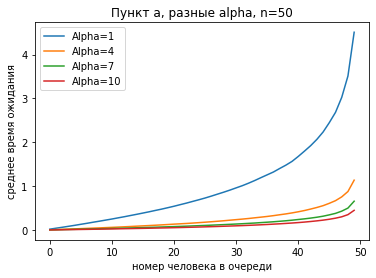

In [2]:
def plot_a_different_alpha():
    attempts = 500
    n = 50
    for alpha in range(1, 12, 3):
        res = np.array([run_a(alpha, n) for _ in range(attempts)]).mean(axis=0)
        plt.plot(range(0, n), res, label="Alpha={}".format(alpha))
    plt.legend()
    plt.title("Пункт a, разные alpha, n={}".format(n))
    plt.xlabel("номер человека в очереди")
    plt.ylabel("среднее время ожидания")
plot_a_different_alpha()

С практики знаем

$$X_1\sim Exp(n*a)$$

$$X_{k+1}-X_k\sim Exp((n-k)a)$$

Откуда $$X_i=Exp(n*a)+Exp((n-1)a)+...+Exp((n-i+1)a)$$

Тогда матожидание $$\frac{1/n+1/(n-1)+...+1/(n-i+1)}{a}$$

И действительно точки из модели хорошо ложатся на эту кривую

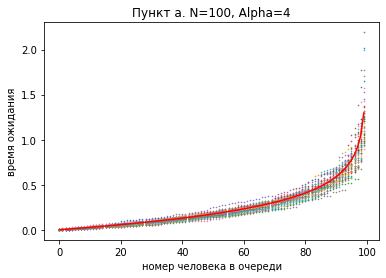

In [3]:
def test_a():
    attempts = 50
    alpha = 4
    n = 100
    pred = np.array([sum([1/i for i in range(n-k, n + 1)])/alpha for k in range(n)])
    for _ in range(attempts):
        plt.scatter(range(0, n), run_a(alpha, n), s=0.3)
    plt.plot(range(0, n), pred, color="red")
    np.array([run_b(alpha, n, n) for _ in range(attempts)])
    plt.title("Пункт a. N={}, Alpha={}".format(n, alpha))
    plt.xlabel("номер человека в очереди")
    plt.ylabel("время ожидания")
test_a()

Теперь пункт b

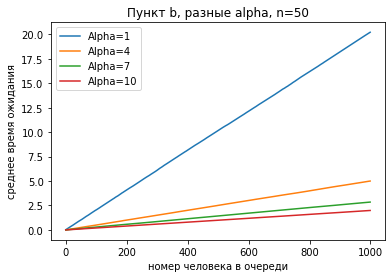

In [4]:
def plot_b_different_alpha():
    attempts = 50
    maxk = 1000
    n = 50
    for alpha in range(1, 12, 3):
        res = np.array([run_b(alpha, n, maxk) for _ in range(attempts)]).mean(axis=0)
        plt.plot(range(0, maxk), res, label="Alpha={}".format(alpha))
    plt.legend()
    plt.title("Пункт b, разные alpha, n={}".format(n))
    plt.xlabel("номер человека в очереди")
    plt.ylabel("среднее время ожидания")
plot_b_different_alpha()

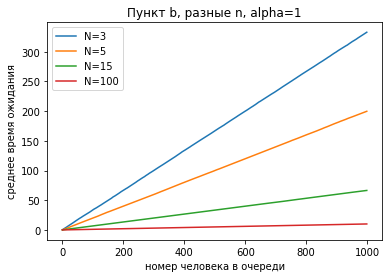

In [5]:
def plot_b_different_n():
    attempts = 50
    maxk = 1000
    alpha=1
    for n in [3, 5, 15, 100]:
        res = np.array([run_b(alpha, n, maxk) for _ in range(attempts)]).mean(axis=0)
        plt.plot(range(0, maxk), res, label="N={}".format(n))
    plt.legend()
    plt.title("Пункт b, разные n, alpha={}".format(alpha))
    plt.xlabel("номер человека в очереди")
    plt.ylabel("среднее время ожидания")
plot_b_different_n()

Из графиков выше можно понять, что формула $\frac{k}{a  n}$. Возьмём фиксированные alpha, n и k

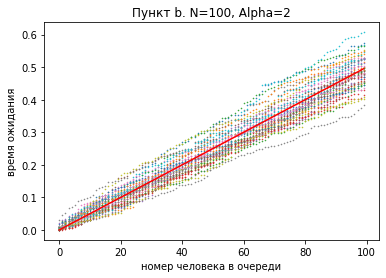

In [6]:
def test_b():
    attempts = 50
    maxk = 100
    alpha=2
    n = 100
    pred = np.array([k / (alpha * n) for k in range(maxk)])
    for _ in range(attempts):
        plt.scatter(range(0, maxk), run_b(alpha, n, maxk), s=0.3)
    plt.plot(range(0, maxk), pred, color="red")
    np.array([run_b(alpha, n, maxk) for _ in range(attempts)])
    plt.title("Пункт b. N={}, Alpha={}".format(n, alpha))
    plt.xlabel("номер человека в очереди")
    plt.ylabel("время ожидания")
test_b()